# DS-SF-34 | 08 | Linear Regression, Part 2 | Assignment | Starter Code

In [8]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [9]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-08-advertising.csv'))

In [10]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


We have 198 observations in this outlier-free dataset.  Each observation records the budget used to run ads on TV, on radio, and in the newspapers (in thousands of dollars) as well as the sale figures (also in thousands of dollars).

Today, we are going to study if we can predict sales based on the amount of advertising.

> ## Question 1.  How are the different variables correlated?

In [6]:
# TV is most highly coorelated to sales. 

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


Answer: TODO

> ## Question 2.  Draw a scatter plot between `TV` (horizontal axis) and `Sales` (vertical axis).

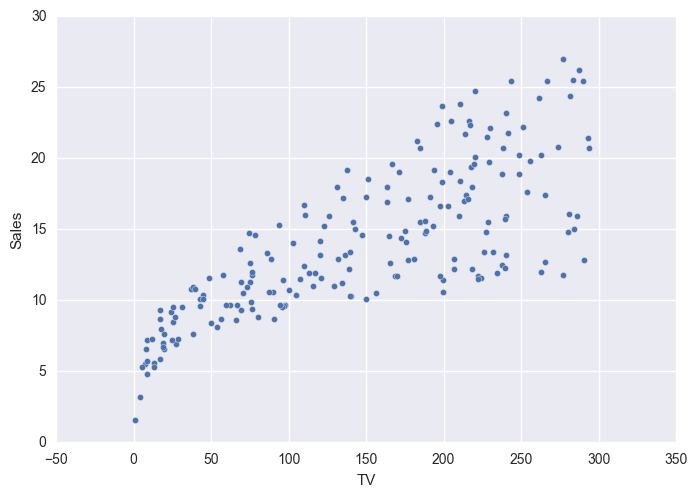

In [6]:
# TODO
df.plot("TV", "Sales", kind='scatter')

> ## Question 3.  Using _seaborn_, draw the same scatter plot along with a fitted line between `TV` and `Sales`.

- (http://seaborn.pydata.org/generated/seaborn.lmplot.html)

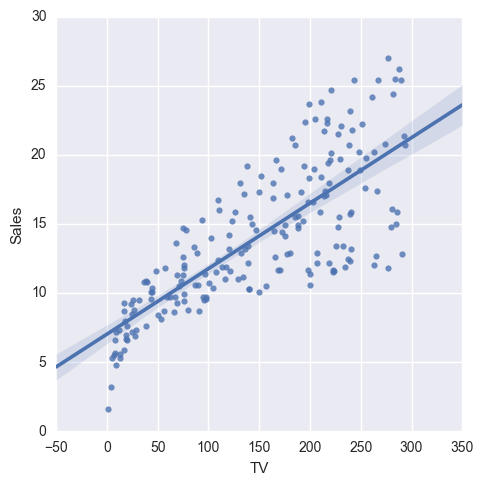

In [7]:
# TODO

sns.lmplot("TV", "Sales", df)

> ## Question 4.  Estimate a simple linear regression between `TV` (explanatory variable) and `Sales` (response variable).

In [8]:
# TODO
smf.ols(formula = "Sales ~ TV", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.29e-41
Time:                        17:12:53   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results = smf.ols(formula = "Sales ~ TV", data = df).fit()

In [20]:
results.params.values

array([ 7.03056146,  0.04738103])

> ## Question 5.  Interpret the coefficients.  Are they significant?  What equation did you derive?

Yes, TV is highly linearly coorelated with increase in sales. It is a significant value. 



> ## Question 6.  How are the residual distributed?  Do they follow the linear modeling assumptions?

In [ ]:
#The residuals are all much lower than the original model. It means that our data is not following linear modeling assumptions. 

In [25]:
model = smf.OLS(df.Sales, df.TV)
results = model.fit()
df["PredictedSales"] = results.predict(df.TV)
df["ResidualsTV"] = (df.PredictedSales - df.TV)
df.ResidualsTV

0     -210.952559
1      -40.796996
2      -15.768727
3     -138.893145
4     -165.754988
          ...    
193    -35.021242
194    -86.361282
195   -162.271199
196   -260.000633
197   -212.786132
Name: ResidualsTV, dtype: float64

In [26]:
df.Sales.head()

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
193     7.6
194     9.7
195    12.8
196    25.5
197    13.4
Name: Sales, dtype: float64

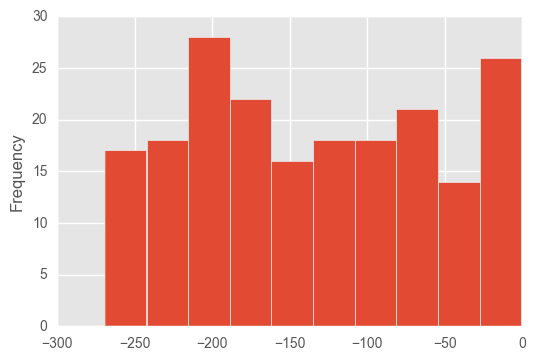

In [27]:
df.ResidualsTV.plot.hist()

In [14]:
# Residuals. The difference between the observed value of the dependent
#variable (y) and the predicted value (ŷ) is called the residual (e).
#Each data point has one residual. 
#Both the sum and the mean of the residuals are equal to zero.
#Error is population. Residual is error at a sample level 

sm.regression.linear_model.RegressionResults(smf, results.params.values)

NameError: name 'results' is not defined

Answer: TODO

> ## Question 7.  Estimate two new simple linear regression models: (1) `Sales` against `Radio` and (2) `Sales` against `Newspaper`.

In [21]:
# TODO

smf.ols(formula = "Sales ~ Radio", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Fri, 12 May 2017   Prob (F-statistic):           5.99e-19
Time:                        11:16:05   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
smf.ols(formula = "Sales ~ Newspaper", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Fri, 12 May 2017   Prob (F-statistic):            0.00188
Time:                        11:16:17   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ## Question 8.  What can you conclude of these two new models against the first one?

#neither are as predictive as the Sales ~ TV regression

> ## Question 9.  Run a multiple linear regression using `TV`, `Radio`, and `Newspaper` as explanatory variables.

In [23]:
smf.ols(formula = "Sales ~ TV + Radio + Newspaper", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Fri, 12 May 2017   Prob (F-statistic):           8.35e-95
Time:                        11:20:18   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ## Question 10.  What are your findings?

All three together do a pretty good job explaining sales. 